In [27]:
#MNIST dataset is a set of 70000 images of digits handwritten by some students that many people evaluate their 
#classification algorithm with it

In [ ]:

# With these lines of code, we can fetch our data 

In [28]:
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [29]:
mnist = loadmat("mnist-original")

In [30]:
mnist

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

In [32]:
x = mnist["data"].T
y = mnist["label"][0]

In [33]:
# There are 70,000 images and each image has 784 features. Because each image is 28*28 pixels
x.shape

(70000, 784)

In [36]:
# As classification is a subset of supervised learning, we have labels for data
y.shape

(70000,)

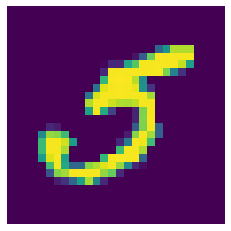

In [47]:
# now let's grab an instance (36000) and see how it looks
some_digit = x[36000]
import matplotlib.pyplot as plt
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image)
plt.axis('off')
plt.show()

Now we should divide our code into a training set and a test set. because after training our model
We need to evaluate the accuracy of our model with data that our model has not seen

In [49]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]  
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

First, let's create a binary classifier to detect only one digit. For example, here I want to build a '5-detector' distinguishing between two classes, 5 and not-5

In [50]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5) 

In [51]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [52]:
sgd_clf.predict([x[36000]])

array([ True])

Now we can see that our model guessed it right, perfect. But how much accurate our model is?
Now it's time to evaluate our model's accuracy.

In [53]:
# A good way to evaluate a model is using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.9641 , 0.9626 , 0.95815])

Our model's accuracy is above 95%. but we should remember that 90 percent of our data is not 5, and even the worst model would have 90 % percent of accuracy. So accuracy is not the best performance measure.
Classifiers are normally evaluated with a confusion matrix, which shows the number of times instances of class A is classified as class B.
For this purpose, we need to have a set of predictions so that they can be compared with actual data.

In [71]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53996,   583],
       [ 1720,  3701]], dtype=int64)

In [68]:
# This matrix shows that:
# 54072 of them were correctly classified as non-5 (true negative)
# 507 were wrongly classified as 5s (false positive)
# 1492 were wrongly classified as non-5 (false negative)
# 3929 were correctly classified as 5 (true positive)
# You can get a lot of information from this matric, two of them are precision and recall

In [70]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) 
# precission 
# By dividing the number of true positive (3929) to sum of true positives (3929) and false positives (507) 

0.8639122315592904

In [62]:
recall_score(y_train_5, y_train_pred) 
# recall
# By dividing the number of true positives (3929) by the sum of true positives (3929) and false positives (507) 

0.6827153661686036

In [63]:
# Or you can combine precision and recall to one single metric called F1, which is the harmonic mean of precision and recall
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)


0.7626996393611541

In [ ]:
# we can increase the precision of our model but recall will be decreased or we can increase recall but precision decreases, 
#so we should find the best precision/recall ratio 

In [73]:
y_scores= cross_val_predict(sgd_clf, x_train, y_train_5, cv=5,
                           method='decision_function')

In [74]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds= precision_recall_curve(y_train_5, y_scores)

In [97]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label="precision")
    plt.plot(thresholds, recalls[:-1], 'g-', label="recall")
    plt.xlabel("threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
    plt.title(' Precision and recall versus the decision threshold')

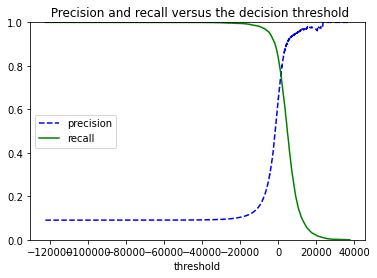

<Figure size 864x432 with 0 Axes>

In [98]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

# the ROC curve

another tool that is used with binary classifiers is the ROC curve. ROC curve plots the true positive rate against the false positive rate

In [99]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds= roc_curve(y_train_5, y_scores)

In [103]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title(" ROC curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel('True Positive Rate')

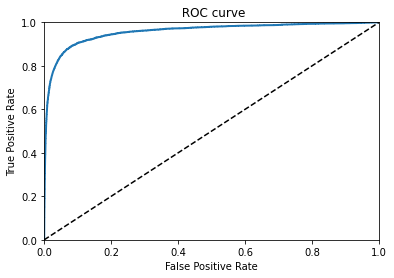

In [104]:
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
#  again this shows that the higher the recall (true positive rate), the less accuracy (false positive rate)

 #multiclass classification

In [105]:
sgd_clf.fit(x_train, y_train)
sgd_clf.predict([some_digit])

array([5.])

In [106]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -1221.56122736, -10984.0092072 , -13578.96486114,
         -4685.72812982, -13796.52359659,    626.79446603,
        -15183.92142871, -13339.99264631,  -8850.53460607,
        -23246.16455486]])

In [109]:
np.argmax(some_digit_scores)
sgd_clf.classes_


array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [112]:
sgd_clf.classes_[5]

5.0

In [114]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(x_train, y_train)
ovo_clf.predict([some_digit])


array([5.])

In [115]:
len(ovo_clf.estimators_)

45

In [119]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(x_train, y_train)
forest_clf.predict([some_digit])

array([5.])

In [122]:
forest_clf.predict_proba([some_digit])

array([[0.02, 0.  , 0.01, 0.08, 0.01, 0.83, 0.  , 0.01, 0.01, 0.03]])

In [121]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring='accuracy')

array([0.8712 , 0.87835, 0.856  ])

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring='accuracy')

D:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.9016 , 0.9025 , 0.89895])